In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 187s 1us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)


Epoch 1/10


704/704 [==============================] - 22s 29ms/step - loss: 1.4794 - accuracy: 0.4772 - val_loss: 1.2680 - val_accuracy: 0.5554
Epoch 2/10
704/704 [==============================] - 19s 26ms/step - loss: 1.1900 - accuracy: 0.5843 - val_loss: 1.1448 - val_accuracy: 0.5972
Epoch 3/10
704/704 [==============================] - 19s 27ms/step - loss: 1.0655 - accuracy: 0.6249 - val_loss: 1.1206 - val_accuracy: 0.6042
Epoch 4/10
704/704 [==============================] - 19s 27ms/step - loss: 0.9790 - accuracy: 0.6580 - val_loss: 1.0692 - val_accuracy: 0.6226
Epoch 5/10
704/704 [==============================] - 19s 27ms/step - loss: 0.9009 - accuracy: 0.6861 - val_loss: 1.0374 - val_accuracy: 0.6410
Epoch 6/10
704/704 [==============================] - 20s 28ms/step - loss: 0.8359 - accuracy: 0.7098 - val_loss: 1.0410 - val_accuracy: 0.6336
Epoch 7/10
704/704 [==============================] - 20s 28ms/step - loss: 0.7772 - accuracy: 0.7302 - val_loss: 1.0277 - val_accurac

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.6527


313/313 [==============================] - 2s 5ms/step


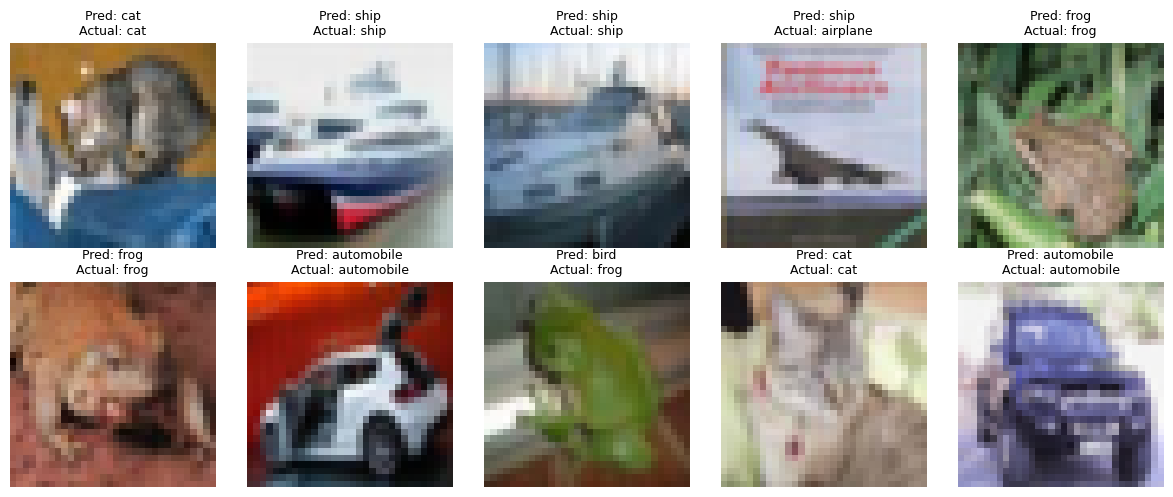

In [9]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 9. Display 10 Sample Images with Predictions and Actual Labels
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    pred_label = class_names[predicted_labels[i]]
    true_label = class_names[true_labels[i]]
    plt.title(f"Pred: {pred_label}\nActual: {true_label}", fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()
